In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import seaborn
seaborn.set()

# Old

Unnamed: 0                                                               17
mean_fit_time                                                      8.011084
std_fit_time                                                       0.024499
mean_score_time                                                    0.494874
std_score_time                                                     0.039658
param_max_features                                                       25
param_min_samples_leaf                                                    2
param_n_estimators                                                      300
params                    {'max_features': 25, 'min_samples_leaf': 2, 'n...
split0_test_score                                                  -0.05145
split1_test_score                                                 -0.038538
split2_test_score                                                 -0.038217
split3_test_score                                                 -0.056456
split4_test_

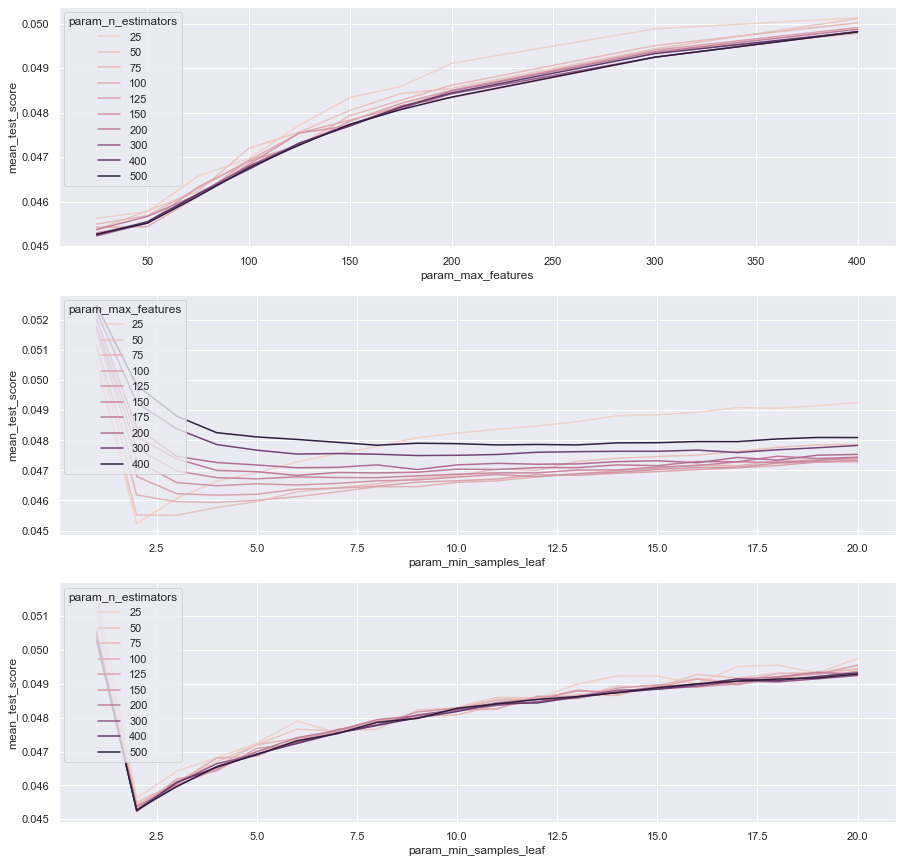

In [94]:
df = pd.read_csv("results/forest_CV2.csv")
best_forest = df.rank_test_score.argmin()
# print(df.loc[best_forest])
grouped = df.groupby(["param_max_features", "param_min_samples_leaf", "param_n_estimators"]).agg({'mean_test_score': lambda x: -x.mean(), 'std_test_score': lambda x: x.mean()}).reset_index()

fig, ax = plt.subplots(3,1, figsize = (15, 15))
seaborn.lineplot(data = grouped[grouped.param_min_samples_leaf == 2 ],
                 x = 'param_max_features',
                 y = 'mean_test_score',
                 hue = 'param_n_estimators',
                 legend = 'full',
                #  style = 'param_min_samples_leaf',
                 ax = ax[0])


seaborn.lineplot(data = grouped[grouped.param_n_estimators == 300 ],
                 x = 'param_min_samples_leaf',
                 y = 'mean_test_score',
                 hue = 'param_max_features',
                 legend = 'full',
                 ax = ax[1])


seaborn.lineplot(data = grouped[grouped.param_max_features == 25 ],
                 x = 'param_min_samples_leaf',
                 y = 'mean_test_score',
                 hue = 'param_n_estimators',
                 legend = 'full',
                 ax = ax[2])

df.loc[df.rank_test_score.argmin()]

Unnamed: 0                                                           585
mean_fit_time                                                  58.043511
std_fit_time                                                    1.594553
mean_score_time                                                 0.497492
std_score_time                                                  0.073612
param_learning_rate                                             0.048211
param_max_depth                                                        7
param_max_features                                                   200
param_n_estimators                                                   600
params                 {'learning_rate': 0.04821052631578947, 'max_de...
split0_test_score                                              -0.050044
split1_test_score                                              -0.038391
split2_test_score                                              -0.038196
split3_test_score                                  

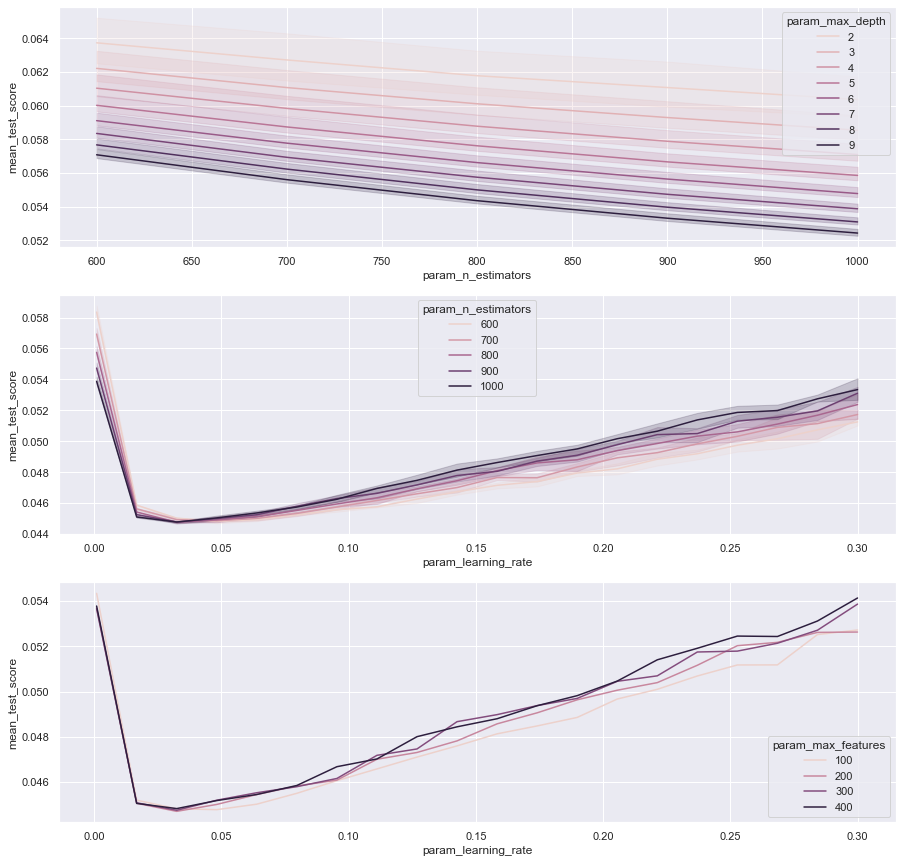

In [216]:
df = pd.read_csv("results/booster_CV2.csv")
df
grouped = df.groupby(["param_learning_rate", "param_max_depth", "param_max_features", "param_n_estimators"]).agg({'mean_test_score': lambda x: -x.mean(), 'std_test_score': lambda x: x.mean()}).reset_index()

fig, ax = plt.subplots(3,1, figsize = (15, 15))
seaborn.lineplot(data = grouped[grouped.param_learning_rate == 0.001 ],
                 x = 'param_n_estimators',
                 y = 'mean_test_score',
                 hue = 'param_max_depth',
                 legend = 'full',
                #  style = 'param_min_samples_leaf',
                 ax = ax[0])


seaborn.lineplot(data = grouped[grouped.param_max_depth == 7 ],
                 x = 'param_learning_rate',
                 y = 'mean_test_score',
                 hue = 'param_n_estimators',
                 legend = 'full',
                 ax = ax[1])


seaborn.lineplot(data = grouped[(grouped.param_n_estimators == 1000) * grouped.param_max_depth == 7 ],
                 x = 'param_learning_rate',
                 y = 'mean_test_score',
                 hue = 'param_max_features',
                 legend = 'full',
                 ax = ax[2])

df.loc[df.rank_test_score.argmin()]

In [88]:
np.sqrt(0.044685)

0.2113882683594338

<AxesSubplot:xlabel='param_learning_rate', ylabel='mean_test_score'>

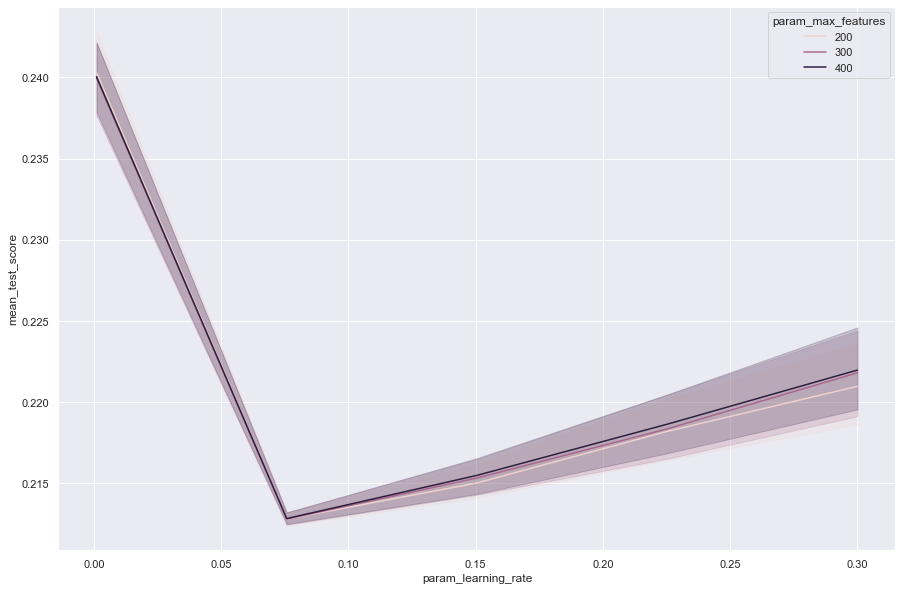

In [65]:
df_ = pd.read_csv("booster_CV.csv")
df3 = df_.groupby(["param_max_features", "param_learning_rate", "param_max_depth", "param_n_estimators"]).agg({"mean_test_score": 'mean'}).reset_index()
df3.mean_test_score = np.sqrt(-df3.mean_test_score)
fig ,ax = plt.subplots(figsize = (15,10))
seaborn.lineplot(data = df3, x = 'param_learning_rate', y = 'mean_test_score', hue = 'param_max_features')


In [70]:
df_

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0,28.537781,0.224936,0.323301,0.011906,0.001,3,200,600,"{'learning_rate': 0.001, 'max_depth': 3, 'max_...",-0.075703,-0.059744,-0.057160,-0.060469,-0.056965,-0.062008,0.006985,225
1,1,37.679086,0.190247,0.354837,0.019129,0.001,3,200,800,"{'learning_rate': 0.001, 'max_depth': 3, 'max_...",-0.072572,-0.056841,-0.054575,-0.060082,-0.055158,-0.059846,0.006645,219
2,2,46.882613,0.429411,0.389681,0.026886,0.001,3,200,1000,"{'learning_rate': 0.001, 'max_depth': 3, 'max_...",-0.070230,-0.054700,-0.052824,-0.059899,-0.053744,-0.058279,0.006459,207
3,3,39.468458,0.256901,0.303822,0.017124,0.001,3,300,600,"{'learning_rate': 0.001, 'max_depth': 3, 'max_...",-0.075043,-0.059044,-0.056592,-0.060418,-0.056621,-0.061544,0.006907,224
4,4,52.710617,0.757688,0.341550,0.030699,0.001,3,300,800,"{'learning_rate': 0.001, 'max_depth': 3, 'max_...",-0.072059,-0.056295,-0.054092,-0.060136,-0.054849,-0.059486,0.006622,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,220,106.494736,1.367653,0.557786,0.031375,0.300,7,300,800,"{'learning_rate': 0.3, 'max_depth': 7, 'max_fe...",-0.063116,-0.045686,-0.043901,-0.066711,-0.047632,-0.053409,0.009535,179
221,221,133.480483,2.153167,0.683741,0.068089,0.300,7,300,1000,"{'learning_rate': 0.3, 'max_depth': 7, 'max_fe...",-0.062152,-0.046408,-0.044389,-0.065515,-0.047494,-0.053191,0.008810,177
222,222,103.913156,1.252782,0.452501,0.038498,0.300,7,400,600,"{'learning_rate': 0.3, 'max_depth': 7, 'max_fe...",-0.059742,-0.045184,-0.043400,-0.062069,-0.046518,-0.051382,0.007873,171
223,223,138.436751,0.674816,0.530433,0.044531,0.300,7,400,800,"{'learning_rate': 0.3, 'max_depth': 7, 'max_fe...",-0.060595,-0.045432,-0.043834,-0.063237,-0.047900,-0.052200,0.008082,175


## Best Forest


In [97]:
forest = RandomForestRegressor(n_estimators=300, min_samples_leaf=2, max_features=25,  n_jobs = -1, verbose = True)
data = pd.read_csv("data/train_data.csv")
X = data.drop(["ScheduleTime", "LoadFactor" ], axis = 1)
y = data.LoadFactor
forest.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   11.3s finished


RandomForestRegressor(max_features=25, min_samples_leaf=2, n_estimators=300,
                      n_jobs=-1, verbose=True)

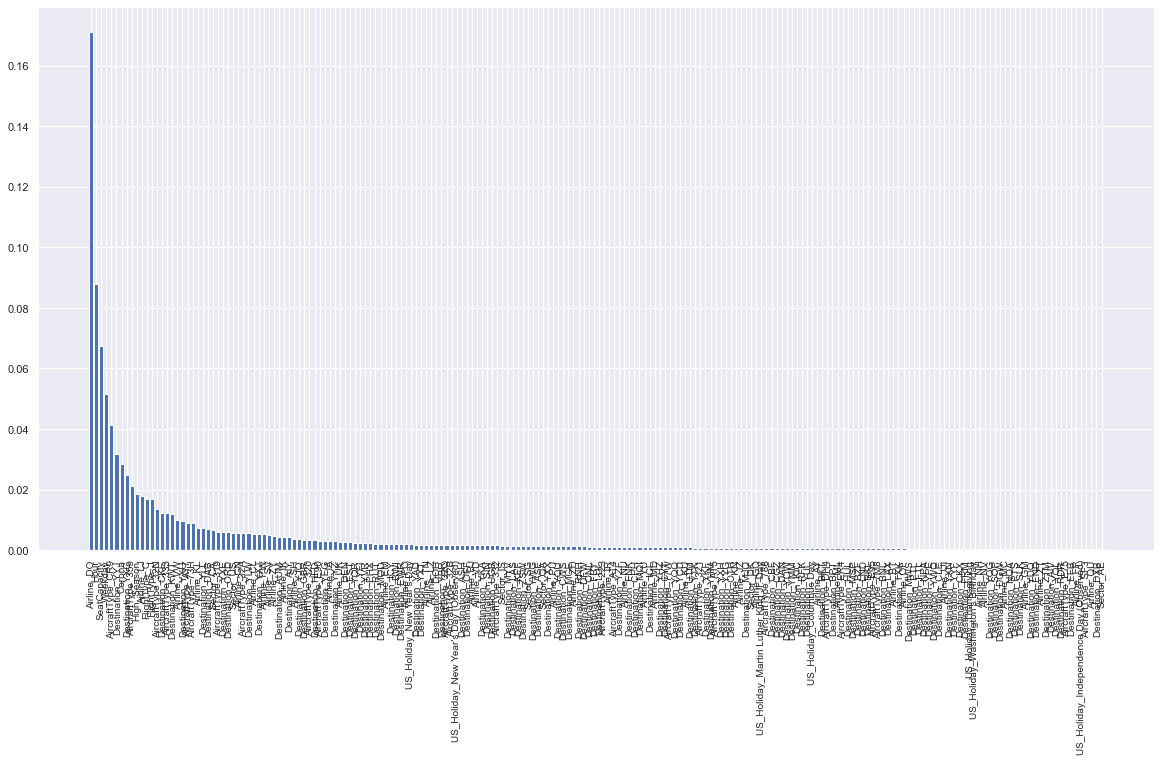

In [114]:
fig, ax = plt.subplots(figsize = (20,10))
idx = forest.feature_importances_.argsort()[::-1]

N = 200
names = X.columns[idx][:N]
vals  = forest.feature_importances_[idx][:N]

ax.bar(range(N), vals)
ax.set_xticks(range(N))
ax.set_xticklabels(names, rotation = 90, fontsize = 10);

In [115]:
model = RandomForestRegressor(n_estimators=300, min_samples_leaf=2, max_features=50,  n_jobs = -1, verbose = True)

grid = GridSearchCV(model, param_grid={}, scoring='neg_mean_squared_error')
grid.fit(X[names], y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   13.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   12.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | e

GridSearchCV(estimator=RandomForestRegressor(max_features=50,
                                             min_samples_leaf=2,
                                             n_estimators=300, n_jobs=-1,
                                             verbose=True),
             param_grid={}, scoring='neg_mean_squared_error')

In [134]:

-pd.read_csv("results/forest_CV2.csv").mean_test_score.max(), -grid.best_score_

,SeatCapacity,Hour,Weekday,High_Season,Corona,Airline_5M,Airline_AP,Airline_AY,Airline_BJ,Airline_BT,...,US_Holiday_Juneteenth National Independence Day,US_Holiday_Juneteenth National Independence Day (Observed),US_Holiday_Labor Day,US_Holiday_Martin Luther King Jr. Day,US_Holiday_Memorial Day,US_Holiday_New Year's Day,US_Holiday_New Year's Day (Observed),US_Holiday_Thanksgiving,US_Holiday_Veterans Day,US_Holiday_Washington's Birthday
0,142,6,4,False,True,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,74,10,4,False,True,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,142,12,4,False,True,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,72,13,4,False,True,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,186,14,4,False,True,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39444,144,18,0,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39445,156,19,0,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39446,98,20,0,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39447,186,19,0,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:

model3 = RandomForestRegressor(max_leaf_nodes=700, verbose = True, n_jobs=-1, n_estimators = 500, max_features=80)


grid = GridSearchCV(model3, param_grid={}, scoring='neg_mean_squared_error')
grid.fit(X, y)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   49.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   47.4s finished
[

GridSearchCV(estimator=RandomForestRegressor(max_features=80,
                                             max_leaf_nodes=700,
                                             n_estimators=500, n_jobs=-1,
                                             verbose=True),
             param_grid={}, scoring='neg_mean_squared_error')

In [122]:
-pd.read_csv("results/forest_CV2.csv").mean_test_score.max()

0.0452300239683201

In [229]:
from sklearn.model_selection import KFold

CV = KFold(5)
errors = []

X_, y_ = X[y != 0].reset_index(drop = 'index'), y[y != 0].reset_index(drop = 'index')
preds = np.zeros(len(X_))
for train_idx, test_idx in CV.split(X_.index, y_.index):
    X_train, X_test = X_.loc[train_idx], X_.loc[test_idx]
    y_train, y_test = y_[train_idx], y_[test_idx]
    # model = RandomForestRegressor(max_leaf_nodes=700, verbose = True, n_jobs=-1, n_estimators = 500, max_features=80)
    model = RandomForestRegressor(n_estimators=300, min_samples_leaf=2, max_features=25,  n_jobs = -1, verbose = True)
    model.fit(X_train, y_train)

    y_hat = model.predict(X_test)

    predicted_no_passengers = X_test.SeatCapacity * y_hat
    actual_no_passenger     = X_test.SeatCapacity * y_test
    preds[test_idx] = y_hat
    err = (1 - abs((actual_no_passenger - predicted_no_passengers)/actual_no_passenger)).mean()
    errors.append(err)
    

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   45.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   43.2s 

35.06160460220144

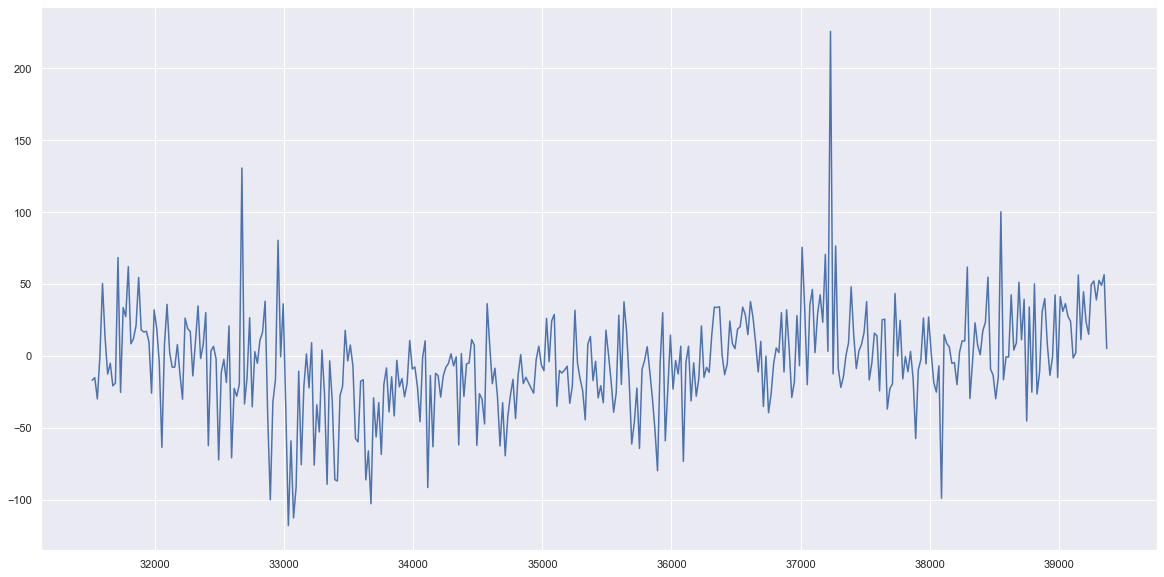

In [227]:
idx = actual_no_passenger.values.argmin()

errs = np.sqrt(pow(actual_no_passenger - predicted_no_passengers, 2).mean())

fig, ax = plt.subplots(figsize = (20,10))

# ax.scatter(actual_no_passenger, errs)
# ax.set_yscale('log')
ax.plot(actual_no_passenger[::20] - predicted_no_passengers[::20])
errs

35.446918162137784

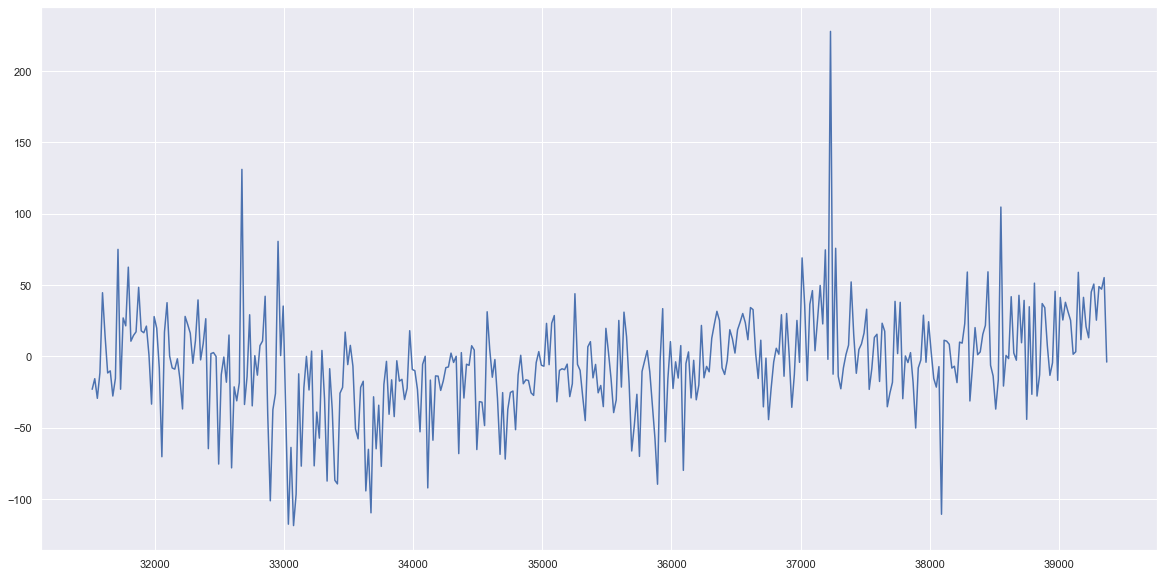

In [230]:
idx = actual_no_passenger.values.argmin()

errs = np.sqrt(pow(actual_no_passenger - predicted_no_passengers, 2).mean())

fig, ax = plt.subplots(figsize = (20,10))

# ax.scatter(actual_no_passenger, errs)
# ax.set_yscale('log')
ax.plot(actual_no_passenger[::20] - predicted_no_passengers[::20])
errs

In [223]:
(1-abs((X_.SeatCapacity * y_ - preds * X_.SeatCapacity)/(X_.SeatCapacity * y_))).mean()

abs(X_.SeatCapacity * y_ - preds * X_.SeatCapacity).mean()

27.11803259620361

In [247]:
data = pd.read_csv("data/train_data.csv")
data = data[data.ScheduleTime < '2022-02-01'] 
train, val = data.ScheduleTime < '2022-01-01', data.ScheduleTime >= '2022-01-01'
X = data.drop(["LoadFactor", "ScheduleTime"], axis = 1)
y = data.LoadFactor


model = GradientBoostingRegressor(subsample = .5)

param_grid = {'n_estimators': [600, 700, 800, 900, 1000],
              'max_features': [100, 200, 300, 400],
              'learning_rate': np.linspace(0.001, 0.3, 15),
              'max_depth': [2,3,4,5,6,7] }

grid = GridSearchCV(model,
                    param_grid=param_grid,
                    scoring = 'neg_mean_squared_error',
                    verbose = True,
                    n_jobs=-1,
                    cv = [(train, val)])
grid.fit(X, y)

pd.DataFrame(grid.cv_results_).to_csv("results/booster_CV_new.csv")

# X[train]

Fitting 1 folds for each of 1800 candidates, totalling 1800 fits


KeyboardInterrupt: 

# New

Unnamed: 0                                                                9
mean_fit_time                                                      1.969319
std_fit_time                                                            0.0
mean_score_time                                                    0.532732
std_score_time                                                          0.0
param_max_features                                                       10
param_min_samples_leaf                                                    2
param_n_estimators                                                       25
params                    {'max_features': 10, 'min_samples_leaf': 2, 'n...
split0_test_score                                                 -0.053264
mean_test_score                                                   -0.053264
std_test_score                                                          0.0
rank_test_score                                                           1
Name: 9, dty

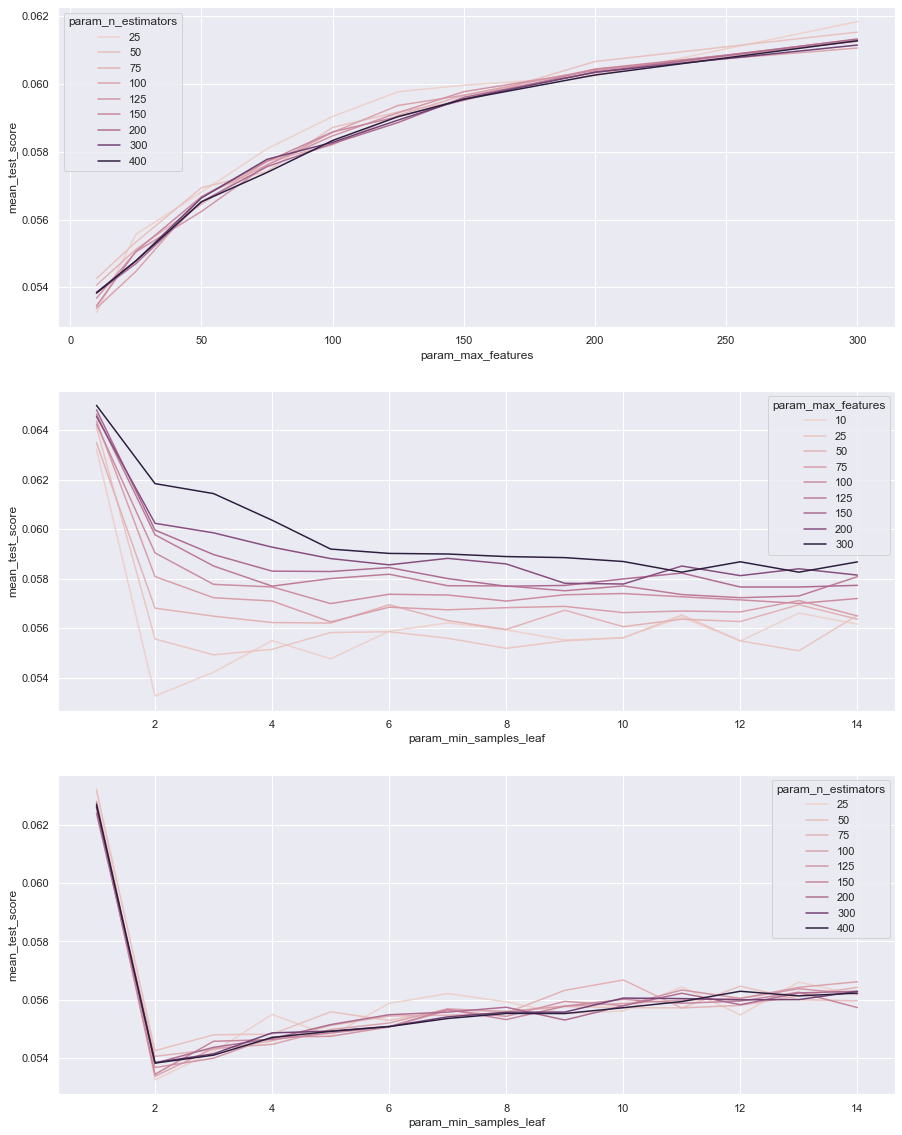

In [18]:
cv_forest = pd.read_csv("results/forest_CV_new.csv")
cv_forest
best_forest = cv_forest.loc[cv_forest.rank_test_score.argmin()]
# print(df.loc[best_forest])
grouped = cv_forest.groupby(["param_max_features", "param_min_samples_leaf", "param_n_estimators"]).agg({'mean_test_score': lambda x: -x.mean(), 'std_test_score': lambda x: x.mean()}).reset_index()

fig, ax = plt.subplots(3,1, figsize = (15, 20))
seaborn.lineplot(data = grouped[grouped.param_min_samples_leaf == 2 ],
                 x = 'param_max_features',
                 y = 'mean_test_score',
                 hue = 'param_n_estimators',
                 legend = 'full',
                #  style = 'param_min_samples_leaf',
                 ax = ax[0])


seaborn.lineplot(data = grouped[grouped.param_n_estimators == 25 ],
                 x = 'param_min_samples_leaf',
                 y = 'mean_test_score',
                 hue = 'param_max_features',
                 legend = 'full',
                 ax = ax[1])


seaborn.lineplot(data = grouped[grouped.param_max_features == 10 ],
                 x = 'param_min_samples_leaf',
                 y = 'mean_test_score',
                 hue = 'param_n_estimators',
                 legend = 'full',
                 ax = ax[2])
best_forest

In [56]:
data = pd.read_csv("data/train_data.csv")
train_data, test_data = data[data.ScheduleTime < '2022-02-01'], data[data.ScheduleTime >= '2022-02-01']
train, val = train_data.ScheduleTime < '2022-01-01', train_data.ScheduleTime >= '2022-01-01'


X_train = train_data[train].drop(["ScheduleTime", "LoadFactor"], axis = 1)
X_val   = train_data[val].drop(["ScheduleTime", "LoadFactor"], axis = 1)

y_train = train_data[train].LoadFactor
y_val   = train_data[val].LoadFactor

X_test  = test_data.drop(["ScheduleTime", "LoadFactor"], axis = 1)
y_test  = test_data.LoadFactor
model = RandomForestRegressor(n_estimators=25, max_features=10, min_samples_leaf = 2)

model.fit(X_train, y_train)
print(pow(model.predict(X_val) - y_val,2).mean())

print(pow(model.predict(X_test) - y_test,2).mean())


0.05359772518073951
0.038440524356634184


In [58]:
(1 - abs((X_test[y_test!=0].SeatCapacity * model.predict(X_test)[y_test != 0] - X_test[y_test!=0].SeatCapacity*y_test[y_test != 0]) / (X_test[y_test!=0].SeatCapacity*y_test[y_test != 0]))).mean()

0.46655629162887763

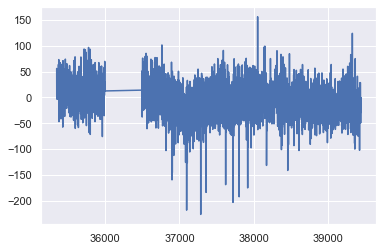

In [63]:
abs(X_test[y_test!=0].SeatCapacity * model.predict(X_test)[y_test != 0] - X_test[y_test!=0].SeatCapacity*y_test[y_test != 0]).mean()
len(X_test)

plt.plot(X_test[y_test!=0].SeatCapacity * model.predict(X_test)[y_test != 0] - X_test[y_test!=0].SeatCapacity*y_test[y_test != 0])
# plt.plot( )

Unnamed: 0                                                           960
mean_fit_time                                                  11.953682
std_fit_time                                                         0.0
mean_score_time                                                 0.120347
std_score_time                                                       0.0
param_learning_rate                                             0.171857
param_max_depth                                                        2
param_max_features                                                   100
param_n_estimators                                                   600
params                 {'learning_rate': 0.17185714285714285, 'max_de...
split0_test_score                                              -0.054762
mean_test_score                                                -0.054762
std_test_score                                                       0.0
rank_test_score                                    

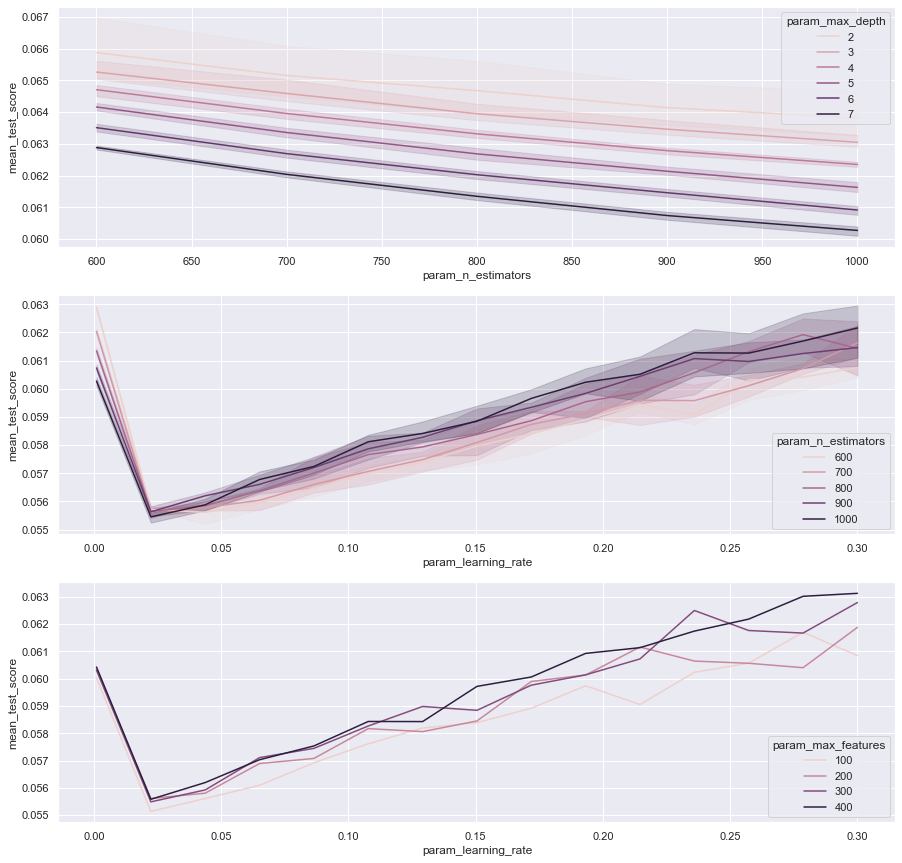

In [21]:
df = pd.read_csv("results/booster_CV_new.csv")
df
grouped = df.groupby(["param_learning_rate", "param_max_depth", "param_max_features", "param_n_estimators"]).agg({'mean_test_score': lambda x: -x.mean(), 'std_test_score': lambda x: x.mean()}).reset_index()

fig, ax = plt.subplots(3,1, figsize = (15, 15))
seaborn.lineplot(data = grouped[grouped.param_learning_rate == 0.001 ],
                 x = 'param_n_estimators',
                 y = 'mean_test_score',
                 hue = 'param_max_depth',
                 legend = 'full',
                #  style = 'param_min_samples_leaf',
                 ax = ax[0])


seaborn.lineplot(data = grouped[grouped.param_max_depth == 7 ],
                 x = 'param_learning_rate',
                 y = 'mean_test_score',
                 hue = 'param_n_estimators',
                 legend = 'full',
                 ax = ax[1])


seaborn.lineplot(data = grouped[(grouped.param_n_estimators == 1000) * grouped.param_max_depth == 7 ],
                 x = 'param_learning_rate',
                 y = 'mean_test_score',
                 hue = 'param_max_features',
                 legend = 'full',
                 ax = ax[2])

df.loc[df.rank_test_score.argmin()]